* Explain how the model works
* Apply the Regressor to scikit-learns "California Housing dataset" with your target being the median house value
* Look into what statistics are available to you to analyze the performance of your model.
* Using those statistics, attempt to hand-tune your model (don't spend too much time on this!)
* After tuning your model, come up with an explanation for why the Model performed as it did
* Be prepared to explain your regressor to the rest of the group

In [18]:
from sklearn import svm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pandas as pd
import numpy as np

data = fetch_california_housing()

X = data.data
y = data.target
df = pd.DataFrame(X, columns = data.feature_names)
df['target'] = data.target
# print(data.DESCR)

print(data.keys())
print(data.target)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=16)


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [45]:
svrl1_model = svm.LinearSVR(loss='epsilon_insensitive', dual='auto')
svrl1_model.fit(X_train,y_train)
svrl1_pred = svrl1_model.predict(X_test)

svrl2_model = svm.LinearSVR(loss='squared_epsilon_insensitive', dual='auto')
svrl2_model.fit(X_train,y_train)
svrl2_pred = svrl2_model.predict(X_test)

n = len(y_test)
k = len(data.feature_names)

mae_l1 = mean_absolute_error(y_test, svrl1_pred)
mse_l1 = mean_squared_error(y_test, svrl1_pred)
r2_l1 = r2_score(y_test, svrl1_pred)
r2_adj_l1 = 1 - ((1 - r2_l1) * (n - 1) / (n - k - 1))

mae_l2 = mean_absolute_error(y_test, svrl2_pred)
mse_l2 = mean_squared_error(y_test, svrl2_pred)
r2_l2 = r2_score(y_test, svrl2_pred)
r2_adj_l2 = 1 - ((1 - r2_l2) * (n - 1) / (n - k - 1))

print(mae_l1)
print(np.sqrt(mse_l1))
print(r2_l1)
print(r2_adj_l1)

print(mae_l2)
print(np.sqrt(mse_l2))
print(r2_l2)
print(r2_adj_l2)

0.6990952627831927
3.135302928892849
-6.382537841120189
-6.396876346274101
0.5893131521663173
0.8167114152278235
0.4990620698096353
0.4980891386512174


/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
svr2_model = svm.SVR(kernel='rbf', epsilon=.3, gamma='scale')
svr2_model.fit(X_train,y_train)
svr2_pred = svr2_model.predict(X_test)

n = len(y_test)
k = len(data.feature_names)

mae = mean_absolute_error(y_test, svr2_pred)
mse = mean_squared_error(y_test, svr2_pred)
r2 = r2_score(y_test, svr2_pred)
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(mae)
print(np.sqrt(mse))
print(r2)
print(r2_adj)

0.8699721168915998
1.1600642174099967
-0.010673148331748816
-0.012636096908261063


In [30]:
poly_model = svm.SVR(kernel='poly')
poly_model.fit(X_train,y_train)
poly_pred = poly_model.predict(X_test)

n = len(y_test)
k = len(data.feature_names)

mae = mean_absolute_error(y_test, poly_pred)
mse = mean_squared_error(y_test, poly_pred)
r2 = r2_score(y_test, poly_pred)
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(mae)
print(np.sqrt(mse))
print(r2)
print(r2_adj)

0.875375730820177
1.1833587621462653
-0.05167010102761194
-0.053712674663985105


In [34]:
sig_model = svm.SVR(kernel='sigmoid')
sig_model.fit(X_train,y_train)
sig_pred = sig_model.predict(X_test)

n = len(y_test)
k = len(data.feature_names)

mae = mean_absolute_error(y_test, sig_pred)
mse = mean_squared_error(y_test, sig_pred)
r2 = r2_score(y_test, sig_pred)
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(mae)
print(np.sqrt(mse))
print(r2)
print(r2_adj)

261.18577713426765
436.5316062047725
-143111.65944249183
-143389.61556668213


In [50]:
print(X.mean())

172.9556735813799


In [10]:
df.to_csv('housing.csv')

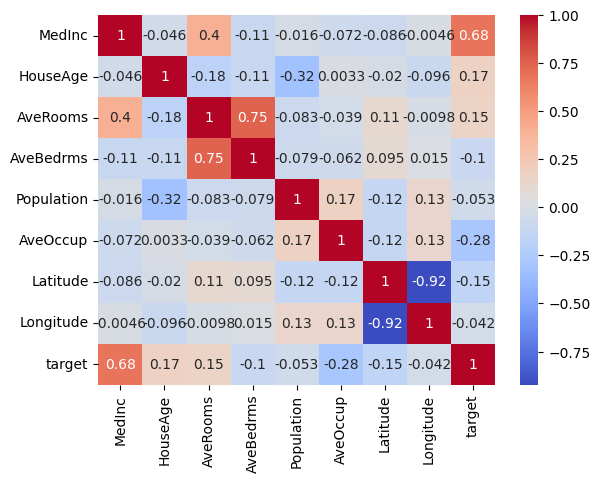

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sample = df.sample(frac=0.05, random_state=16)
corr_matrix = sample.corr()
# sns.pairplot(sample)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()